<a href="https://colab.research.google.com/github/UditSrinivasan/dataScience_learn/blob/main/Music_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Set - https://www.kaggle.com/competitions/kkbox-music-recommendation-challenge/code

## **Import Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Library Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Datasets**

In [ ]:
#IMPORTING DATASETS
ntr = 7000
nts = 3000
data_path = r"/content/drive/MyDrive/train.csv"
train = pd.read_csv(data_path,nrows=ntr)
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv(data_path,names=names,skiprows=ntr,nrows=nts)
songs = pd.read_csv(r"/content/drive/MyDrive/songs.csv")
members = pd.read_csv(r"/content/drive/MyDrive/members.csv")

# **Train Dataset**

In [ ]:
train.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1


In [ ]:
train.sample(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
2320,W/GqJ6FXRpLVtIoLGjbXvRJIOTOWHXWnjtltRgh0+w0=,8iUl06vBFUY/0AUvz7EpYrFHEa8ObciYNlKCIcrp3Xo=,my library,Local playlist more,local-library,1
5950,6vDnqArot3MS62T5xyl6bk1wGqZR3mhG9OLGN6heCWo=,itxXLRAtaLyj+idcWIsuKB0AEzijUgPrMhAvAKUSE2k=,my library,Local playlist more,local-library,0
2719,GtFl3jeR9b2QD4UNj695WaAq21rsTUloyUYzP1djrbw=,gZphe9aRvr0vVO/oEt23amqyDc+YabbIJ9WIzZTVjG0=,my library,Local playlist more,local-library,1
4433,VvtT1uuRyLaVdpCwprxIMAVDGUmRsutSn0ThDJLYtZw=,8KDGhAy0Rym6oGOVlFA/XHhBxZ8b90gAH845Ye3h/Bo=,my library,Local playlist more,local-playlist,1
1761,zm0q0nAyBrre9In8GYtol+6aLYaaPOUMHPs6Yxdodhk=,yPiUXkCI/n+lHuTZ2rApqlRIj8gFM0cH9MpOQBpsI+4=,discover,Discover Genre,online-playlist,0
5508,84ljOrRPGkxKSny9k9xgyItwJ5QLQ4spfh64EHWDlgY=,/ajuFVPCUI+0T9BJktXmpAS4P9WvQ0GQ4tzKv743qDc=,my library,Local playlist more,local-playlist,1
4950,Hjaamz8gAiab26IZAxGJFR7YVexn2Mep9x+5gBV9i3g=,Jw0CAzRAZCaiRzBJAjoGGqY+cVxBX4z+V/oeJ7muYfU=,my library,Local playlist more,local-playlist,1
573,Ix1RlLsCGktMc8Q5oogErdJbfKL+HYj116+bYZ4qzMc=,ikMwb/NDfdL7ls8LlF1jNBmVFpMO2zf1731s93HBIiw=,my library,Local playlist more,local-library,0
1484,eY/EqeACqZNTlI2FlFKh8m4ldY7b4UGppByKhAWUL3o=,aRZlTjtdmMG2jifvMN/mBcl+SWyXB+zxbrZjoO5LdFE=,my library,Local playlist more,local-playlist,1
1176,qsejlbD5SaELFXE3qje4Ug/p2sgVCXZ1u6bf5n6jQBQ=,svvC+SQU8kn8JkhdORcHYWYK2sYELZ33ya9U7Fr64/g=,my library,Local playlist more,local-library,1


In [ ]:
train.sample

<bound method NDFrame.sample of                                               msno  \
0     FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1     Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2     Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3     Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4     FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
...                                            ...   
6995  kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=   
6996  RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=   
6997  RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=   
6998  kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=   
6999  RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=   

                                           song_id source_system_tab  \
0     BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1     bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2     JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3     2A87tzfnJTSWqD7gIZHisolhe

In [ ]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [ ]:
train.describe()

,target
count,7000.000000
mean,0.783429
std,0.411937
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                7000 non-null   object
 1   song_id             7000 non-null   object
 2   source_system_tab   6986 non-null   object
 3   source_screen_name  6815 non-null   object
 4   source_type         6986 non-null   object
 5   target              7000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 328.2+ KB


In [ ]:
train.isnull().sum()

msno                    0
song_id                 0
source_system_tab      14
source_screen_name    185
source_type            14
target                  0
dtype: int64

# **Songs Dataset**

In [ ]:
songs.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [ ]:
songs.sample(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
52689,NqHxpj2eqADIJiaBbmGiDwFijrwfjMkFmy8aH+WlgOA=,224722,465,2010 The Hottest,NaN,NaN,52.0
1866319,5va0lIgWQyfBF4f+DJUcafRmANIassKC6S5S/l8lO9U=,260527,1616,Bel Air,Maxi Priest| Gary Benson| Winston Sela,Maxi Priest| Gary Benson| Winston Sela,52.0
2207289,Xr+P+7LnDqo4guRwXtYuIe6nR8VfOTdR1v2Wm2F2E6g=,317648,921|359,Various Artists,NaN,NaN,52.0
2294752,nJtYnTbRD/Jbh7dxMhB3t63ls33wVLRhXfB/hagmdI0=,227834,1944|310,Corde Oblique,Riccardo Prencipe,NaN,52.0
509665,HWabtvHxkClf0bUDItom7K0EKcRXSFfS2SkwwfwUTlY=,178364,1259,Mr. Criminal,Mr.Criminal,Mr.Criminal,52.0
89482,kmkA/5l8XDi0AlSNpCbt+FH8ckx0z2raVRejFsRc5ic=,153391,465,Elvis Presley,NaN,NaN,52.0
2077533,jRCBDQ9Bend6IiNAZMQZ26T9m6HOplIdsuXEfFXjozE=,196258,1609,Various Artists,NaN,NaN,-1.0
1021666,jywt9LEvSUl1pp9Y4kqHR2Ew7Psv57zoBEQ128zutko=,93901,1011,Chet Atkins,Francisco Tárrega,NaN,52.0
882608,fDCXzY//qd9t0pNu6wNts1nVcSbXHAbGoEXOyzdUHKo=,269305,NaN,Various Artists,Jawad Ahmed|Sharib Sabri|Toshi Sabri,Kumaar|Ahmad Anees,38.0
2244065,vH7YUWurtQqvkzUsPGg1DmYIigQHF03p07n3ZC0V5ds=,230112,921,Various Artists,Ganeko| Hiroyama| Hokama| Murayama| Kitao,NaN,52.0


In [ ]:
songs.shape

(2296320, 7)

In [ ]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [ ]:
songs.describe

<bound method NDFrame.describe of                                               song_id  song_length genre_ids  \
0        CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1        o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2        DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3        dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4        W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   
...                                               ...          ...       ...   
2296315  lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=        20192       958   
2296316  nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=       273391       465   
2296317  9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=       445172      1609   
2296318  UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=       172669       465   
2296319  V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=       270466       829   

     

# **Members Dataset**

In [ ]:
members.head(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613


In [ ]:
members.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
20219,TJL2k7Tq6/O612Rj7MvK/8f3MaB7hx/n+cxRdmrxtn8=,1,0,NaN,4,20170101,20170105
25847,LhqwvQrJkhaUjM8/PHQ5aeqApbiGcQe9UaraY2RAJoI=,1,0,NaN,4,20161228,20161231
14018,x8RDHiksXYKT+bx575eZO4OEzm9x4vLTki4ISQHhmKM=,1,0,NaN,7,20160223,20170210
8025,rXl0olE5umb6m7W5rlEgwASTJURKJhINcwPIlrYamHs=,13,33,female,9,20090527,20131015
680,zLuGhgUHbT43jdsoc4p7M06K/nWwbshxJF5/up6p8oc=,1,0,NaN,7,20120110,20170914
19225,6zTgA6SBi9fjUcYUtl5frETxtGiHRVI8vMkru/htW9c=,1,0,NaN,4,20161225,20170808
21204,bM4dsvH5shLugNb/ogBYdTNZTc/i84q10OkHY4PdI6g=,5,16,female,3,20121025,20170912
30125,lAaB2p3unQ59HF+KGaS3ONengQVpGx6iCu/ZECEhowE=,22,44,male,3,20161218,20170108
24438,9ijgLhtFIb0vwRnRCe91ZJmx4mZCLa9x9XN2GpLT0Co=,5,21,male,9,20130207,20171223
6441,lNc/teZQt89jgb9cCGr/rEL1+U8L83J40aGN63pj4tM=,1,0,NaN,4,20170227,20170818


In [ ]:
members.shape

(34403, 7)

In [ ]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [ ]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [ ]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [ ]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

# **Data Visualization**

<Axes: xlabel='source_system_tab', ylabel='count'>

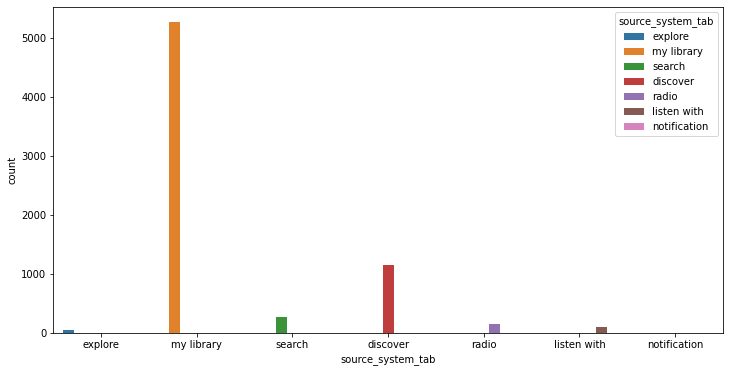

In [ ]:
#DATA VISUALIZATION
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab'])

<Axes: xlabel='source_system_tab', ylabel='count'>

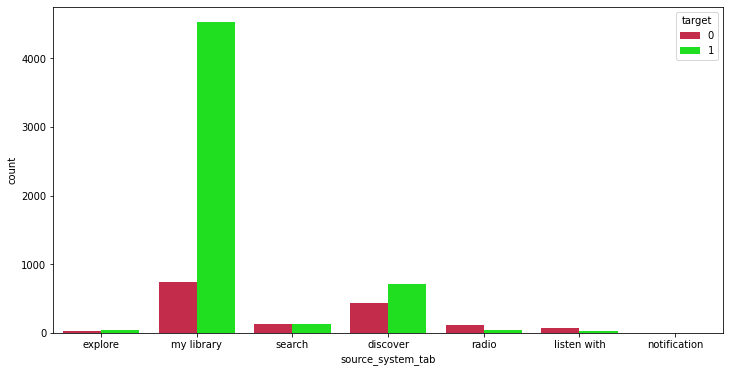

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_system_tab'],palette=['crimson','lime'],hue=train['target'])

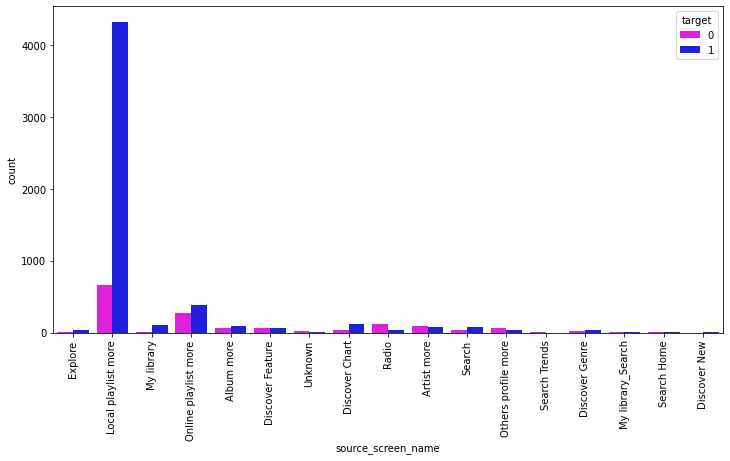

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_screen_name'],palette=['magenta','blue'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()


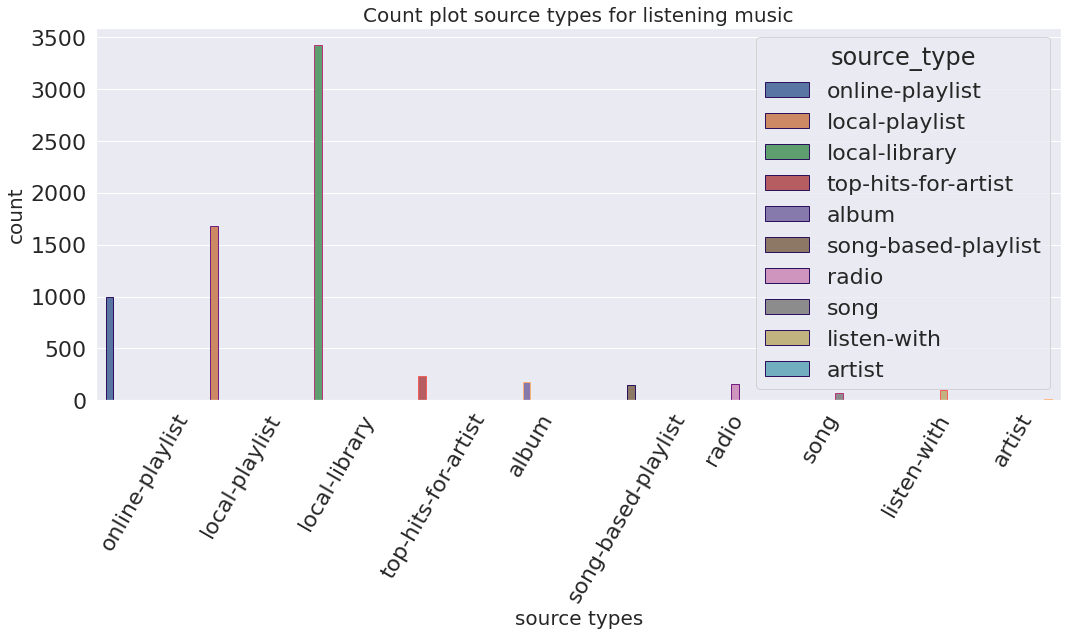

In [ ]:
plt.figure(figsize=(15,9))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train,edgecolor=sns.color_palette('magma',5))
sns.set(style="ticks")
plt.xlabel('source types',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation=60)
plt.title('Count plot source types for listening music',fontsize=20)
plt.tight_layout()



1.   source_system_tab indicates the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions.

2. It can be depicted from the above plot that people repeat songs from their library or discover tabs.

3. From notifications or settings tab people are not interested to repeat songs.



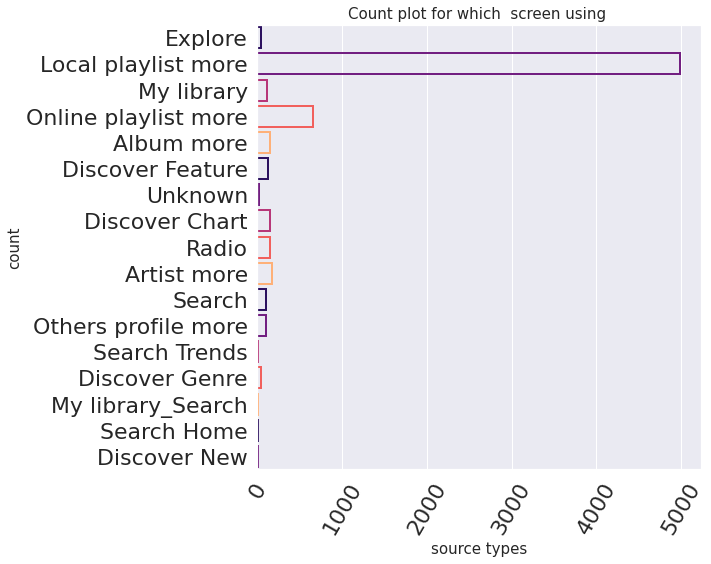

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=train,facecolor=(0,0,0,0),linewidth=2,edgecolor=sns.color_palette('magma',5))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation=60)
plt.title('Count plot for which  screen using ',fontsize=15)
plt.tight_layout()

In [ ]:
def count_plot(data, x, hue, type):
  plt.figure(figsize = (15, 8))
  sns.set(font_scale = 2)
  sns.countplot(x = x, hue = hue, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = 90)
  plt.title('Count plot for {0} in {1} data'.format(x, type), fontsize = 30)
  plt.tight_layout()
  plt.show()

In [ ]:
# Function to plot histograms for categories

def count_plot_function(data, x):
  plt.figure(figsize = (15,10))
  sns.set(font_scale = 2)
  sns.countplot(x = x, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = 90)
  plt.title('Count plot', fontsize = 30)
  plt.tight_layout()

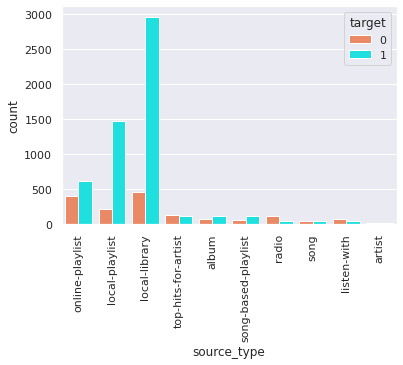

In [ ]:
sns.countplot(x = train['source_type'],palette=['coral','cyan'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

# **Members.csv Visualization**

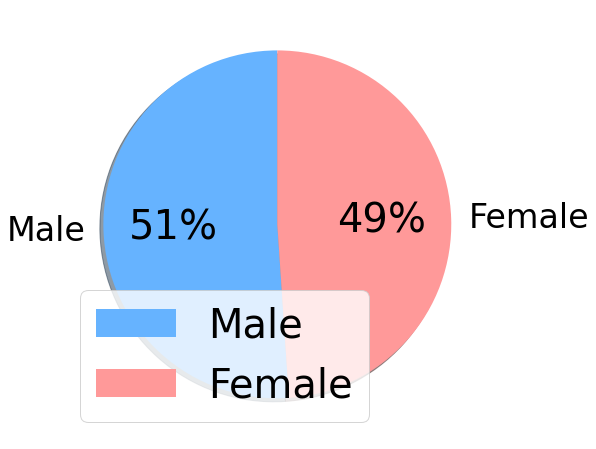

In [ ]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
colors = ['#66b3ff','#ff9999']
plt.figure(figsize = (8, 8))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels,colors=colors, autopct='%.0f%%',
                                    shadow=True, radius=1,startangle=90)
for t in texts:
    t.set_size('small')
plt.legend(loc='lower left')
plt.show()

<Axes: xlabel='language', ylabel='count'>

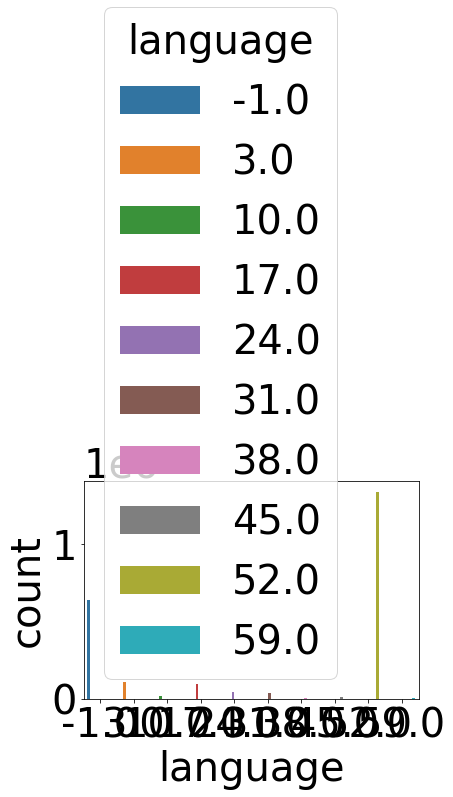

In [ ]:
sns.countplot(x = songs['language'],data =train,hue=songs['language'],orient='v')

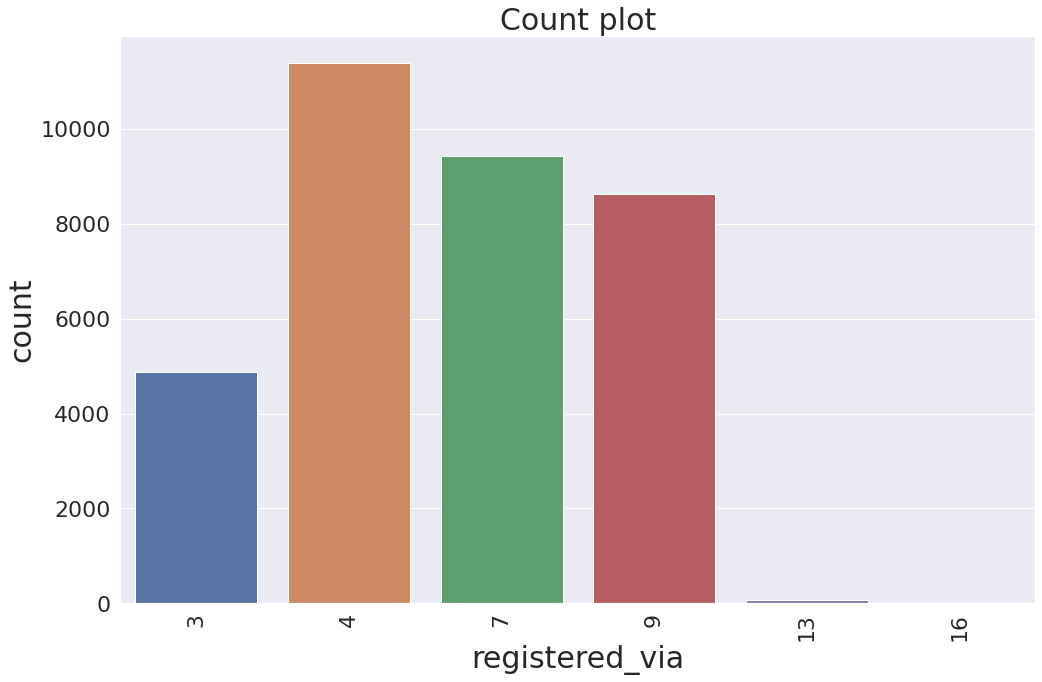

In [ ]:
count_plot_function(members, 'registered_via')

Most of the registrations happened via method '4', '7' and '9'.

Few uses have registered theirselves via '13' and '16' methods.

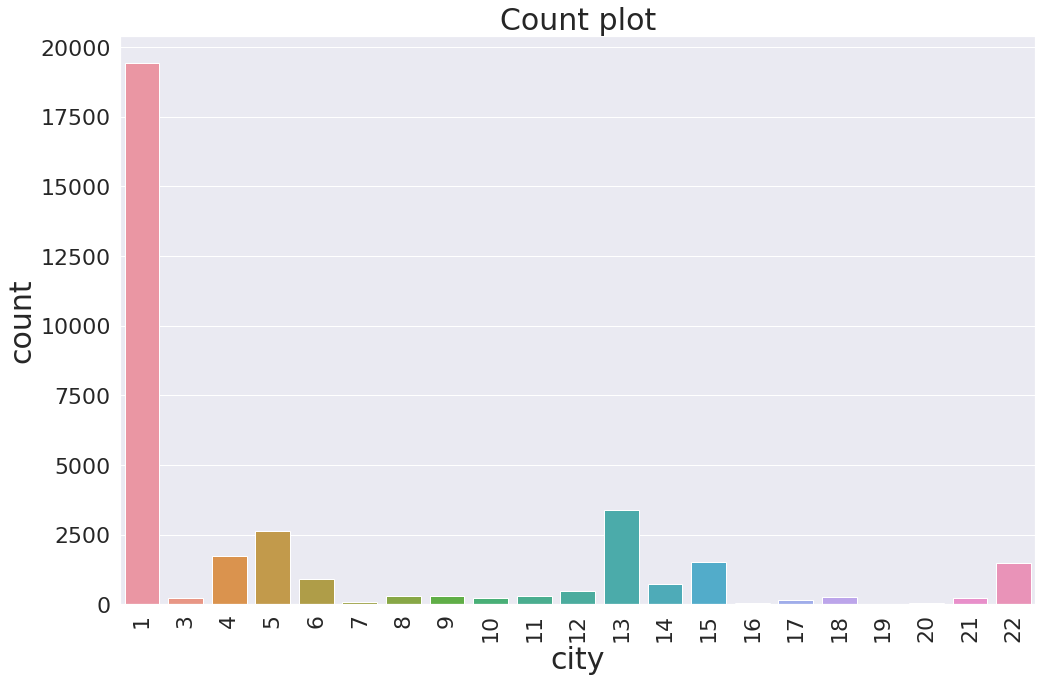

In [ ]:
count_plot_function(members, 'city')

Most of the people who used to listen songs are from '1'- labelled city.

Some cities have very few people who prefer listening music via this music app

# **Cleaning and Data Preprocessing**

In [ ]:
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [ ]:
test_name = ['id','msno','song_id','source_system_tab',\
             'source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [ ]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [ ]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [ ]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [ ]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [ ]:
train = train.fillna(-1)
test = test.fillna(-1)

In [ ]:
import gc
del members, songs; gc.collect();

In [ ]:
colm = list(train.columns)
colm.remove('target')

In [ ]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(colm):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

 17%|█▋        | 5/29 [00:00<00:00, 2040.43it/s]


KeyError: ignored

In [ ]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})

train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

In [ ]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Model Building**

In [ ]:
#MODEL BUILDING
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
    test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

# **Trying Out Basic Classification Models**

In [ ]:
#TRYING OUT BASIC CLASSIFICATION MODELS
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    #accuracy_score = m1_model.metrics.accuracy_score(y_valid,y_pred)
    #print('Accuracy Score : {}'.format(accuracy_score))
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

# **Predicting training score & accuracy on test data using LogisticRegression & Random Forest Classifier**



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
predict(LogisticRegression())

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Score : 0.7833333333333333


ValueError: ignored

In [ ]:
p_test = model1.predict(X_test)

ValueError: ignored

# **Prediction Using Lightbgm**

In [ ]:
#PREDICTION USING LIGHTGBM
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, \
early_stopping_rounds=10, verbose_eval=10)

/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

# **Printing Accuracy of LGBM model on testing data**

In [ ]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

NameError: ignored